In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import datasets,linear_model, tree
from sklearn.preprocessing import scale, StandardScaler
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
#from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\Ravi\\Desktop\\jupyter'

In [3]:
os.chdir("F:\\Afitech PPML Datasets")

In [4]:
df=pd.read_csv("hpc_breakdowns.csv")

In [5]:
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df.tail()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2049275,2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2049279,2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ MB


In [8]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Slicing The Last 2 Lakh Rows

In [9]:
df.drop(df.tail(200000).index,inplace=True)

In [10]:
df.shape

(1849280, 10)

In [11]:
df.tail()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849275,1862789,2/7/2010,07:53:00,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,1862790,2/7/2010,07:54:00,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,1862791,2/7/2010,07:55:00,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,1862792,2/7/2010,07:56:00,0.376,0.204,236.15,1.8,0.0,0.0,1.0
1849279,1862793,2/7/2010,07:57:00,0.374,0.202,235.70,1.8,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849280 entries, 0 to 1849279
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 155.2+ MB


In [13]:
df.corr()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Unnamed: 0,1.000000,-0.021192,0.048311,0.278375,-0.026335,-0.007346,-0.034708,0.080740
Global_active_power,-0.021192,1.000000,0.250001,-0.397770,0.998920,0.485627,0.437460,0.634829
Global_reactive_power,0.048311,0.250001,1.000000,-0.116041,0.268457,0.130711,0.140119,0.084316
Voltage,0.278375,-0.397770,-0.116041,1.000000,-0.409553,-0.196699,-0.168990,-0.264535
Global_intensity,-0.026335,0.998920,0.268457,-0.409553,1.000000,0.490148,0.443356,0.622682
Sub_metering_1,-0.007346,0.485627,0.130711,-0.196699,0.490148,1.000000,0.055715,0.104600
Sub_metering_2,-0.034708,0.437460,0.140119,-0.168990,0.443356,0.055715,1.000000,0.080673
Sub_metering_3,0.080740,0.634829,0.084316,-0.264535,0.622682,0.104600,0.080673,1.000000


# Identifying The Outliers

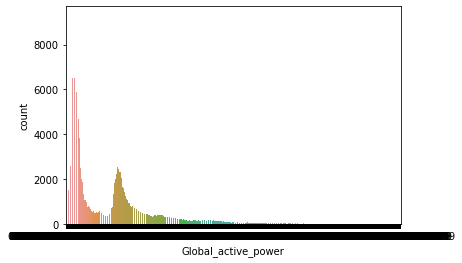

In [14]:
sns.countplot(x=df['Global_active_power'],data=df)

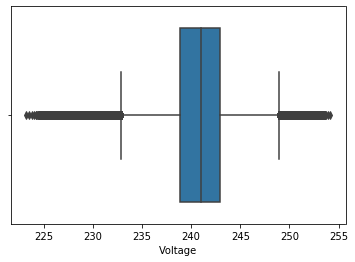

In [15]:
sns.boxplot(x=df['Voltage'],data=df)

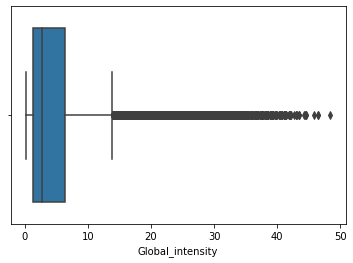

In [16]:
sns.boxplot(x=df['Global_intensity'],data=df)

# Checking The Global Intensity

In [17]:
count=0
for item in df['Global_intensity']:
    if item > 15:
        count=count+1
        
print(count) 

73981


# Missing Value Treatment

In [18]:
df.isnull().sum()

Unnamed: 0                  0
Date                        0
Time                        0
Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [19]:
print(df['Global_active_power'].value_counts(dropna=False))

0.218    9245
0.216    9045
0.220    8779
0.222    8614
0.224    8482
         ... 
7.536       1
7.260       1
9.732       1
8.932       1
8.444       1
Name: Global_active_power, Length: 4181, dtype: int64


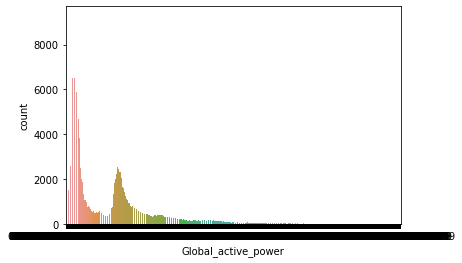

In [20]:
sns.countplot(x="Global_active_power",data=df)
plt.show()

In [21]:
Global_active_power_Null=df[df['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[7944, 7945, 7946, 7947, 7948, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29488, 29489, 29490, 29491, 29492, 29493, 29494, 29495, 29496, 29497, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 64740, 64741, 64742, 64743, 64744, 64745, 64746, 64747, 64748, 64749, 64750, 64751, 64752, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64760, 64761, 64762, 64763, 64764, 64765, 64766, 64767, 64768, 64769, 64770, 64771, 64772, 64773, 64774, 64775, 64776, 64777, 64778, 64779, 64780, 64781, 64782, 64783, 64784, 64785, 64786, 114187, 114188, 114189, 114190, 114191, 114192, 114193, 114194, 114195, 114196, 114197, 114198, 114199, 114200, 114201, 114202, 114203, 114204, 114205, 114206, 114207, 114208, 114209, 114210, 114211, 114212, 114213, 114214, 114215, 114216, 114217, 114218, 114219, 114220, 114221, 114222, 114223, 114224, 114

In [22]:
Global_active_powerMedian=df['Global_active_power'].median()
print(Global_active_powerMedian)

0.62


In [23]:
df['Global_active_power'].iloc[Global_active_power_Null]=Global_active_powerMedian

C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
Global_active_power_Null=df[df['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[]


In [25]:
print(df['Global_reactive_power'].value_counts(dropna=False))

0.000    444686
0.100     20106
0.098     20047
0.096     20033
0.102     19972
          ...  
1.186         1
0.952         1
1.180         1
1.044         1
0.976         1
Name: Global_reactive_power, Length: 530, dtype: int64


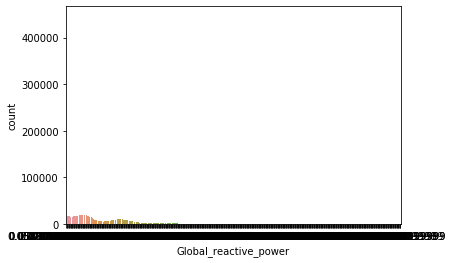

In [26]:
sns.countplot(x="Global_reactive_power",data=df)
plt.show()

In [27]:
Global_reactive_power_Null=df[df['Global_reactive_power'].isnull()].index.tolist()
print(Global_reactive_power_Null)

[251237, 251238, 251239, 251240, 251241, 251242, 251243, 251244, 251245, 251246, 251247, 251248, 251249, 251250, 251251, 251252, 251253, 251254, 251255, 251256, 251257, 251258, 251259, 251260, 251261, 251262, 251263, 251264, 251265, 251266, 251267, 251268, 251269, 251270, 251271, 251272, 251273, 251274, 251275, 251276, 266921, 266922, 266923, 266924, 266925, 266926, 266927, 266928, 266929, 266930, 266931, 266932, 266933, 266934, 266935, 266936, 266937, 266938, 266939, 266940, 266941, 266942, 266943, 266944, 266945, 266946, 266947, 266948, 266949, 266950, 266951, 266952, 266953, 266954, 266955, 286205, 286206, 286207, 286208, 286209, 286210, 286211, 286212, 286213, 286214, 286215, 286216, 286217, 286218, 286219, 286220, 286221, 286222, 286223, 286224, 286225, 286226, 286227, 286228, 286229, 286230, 286231, 286232, 286233, 286234, 286235, 286236, 286237, 286238, 286239, 286240, 286241, 286242, 286243, 286244, 286245, 286246, 286247, 286248, 286249, 286250, 286251, 286252, 286253, 286254,

In [28]:
df['Global_reactive_power'].iloc[Global_reactive_power_Null]="0.000"
Global_reactive_power_Null=df[df["Global_reactive_power"].isnull()].index.tolist()
print(Global_reactive_power_Null)

[]


In [29]:
print(df['Voltage'].value_counts(dropna=False))

241.18    3176
241.02    2884
241.12    2873
241.53    2870
241.35    2868
          ... 
224.74       1
224.24       1
223.99       1
223.49       1
223.85       1
Name: Voltage, Length: 2835, dtype: int64


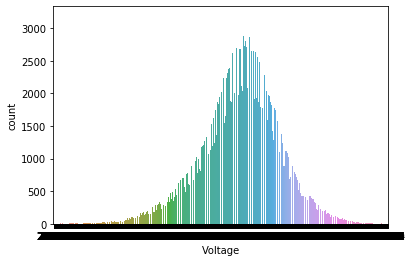

In [30]:
sns.countplot(x="Voltage",data=df)
plt.show()

In [31]:
Voltage_Null=df[df["Voltage"].isnull()].index.tolist()
print(Voltage_Null)

[37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37789, 37790, 37791, 37792, 37793, 37794, 37795, 37796, 37797, 37798, 37799, 37800, 37801, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37811, 37812, 101184, 101185, 101186, 101187, 101188, 101189, 101190, 101191, 101192, 101193, 101194, 101195, 101196, 101197, 101198, 101199, 101200, 101201, 101202, 101203, 101204, 101205, 101206, 101207, 101208, 101209, 101210, 101211, 101212, 101213, 101214, 101215, 101216, 101217, 101218, 101219, 101220, 101221, 101222, 101223, 101224, 101225, 101226, 101227, 126272, 126273, 126274, 126275, 126276, 126277, 126278, 126279, 126280, 126281, 126282, 126283, 126284, 126285, 126286, 126287, 126288, 126289, 126290, 126291, 126292, 126293, 126294, 126295, 126296, 126297, 126298, 126299, 126300, 126301, 126302, 126303, 126304, 126305, 126306, 126307, 126308, 126309, 126310, 126311, 126312, 126313, 126314, 126315, 126316, 126317, 126318, 126319, 126320, 126321, 126322, 126323, 

In [32]:
VoltageMean=df['Voltage'].mean()
print(VoltageMean)

240.80082135531356


In [33]:
df['Voltage'].iloc[Voltage_Null]=VoltageMean

In [34]:
Voltage_Null=df[df["Voltage"].isnull()].index.tolist()
print(Voltage_Null)

[]


In [35]:
print(df['Global_intensity'].value_counts(dropna=False))

1.0     154372
1.4     150368
1.2     123211
1.6     101474
1.8      85680
         ...  
42.2         1
43.2         1
42.6         1
40.6         1
48.4         1
Name: Global_intensity, Length: 221, dtype: int64


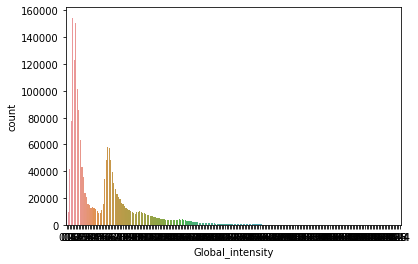

In [36]:
sns.countplot(x="Global_intensity",data=df)
plt.show()

In [37]:
Global_intensity_Null=df[df["Global_intensity"].isnull()].index.tolist()
print(Global_intensity_Null)

[7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 14229, 14230, 14231, 14232, 14233, 14234, 14235, 14236, 14237, 14238, 14239, 14240, 14241, 14242, 14243, 14244, 14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14267, 14268, 14269, 14270, 14271, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 38637, 38638, 38639, 38640, 38641, 38642, 38643, 38644, 38645, 38646, 38647, 38648, 38649, 38650, 38651, 38652, 38653, 38654, 38655, 38656, 38657, 83197, 83198, 83199, 83200, 83201, 83202, 83203, 83204, 83205, 83206, 83207, 83208, 83209, 83210, 83211, 83212, 83213, 83214, 83215, 83216, 83217, 83218, 83

In [38]:
Global_intensityMedian=df['Global_intensity'].median()
print(Global_intensityMedian)

2.8


In [39]:
df['Global_intensity'].iloc[Global_intensity_Null]=Global_intensityMedian

In [40]:
Global_intensityMedian=df['Global_intensity'].median()
print(Global_intensityMedian)

2.8


In [41]:
print(df['Sub_metering_1'].value_counts(dropna=False))

0.0     1692593
1.0       77792
2.0       17553
38.0      15273
37.0      13858
         ...   
82.0          3
87.0          3
88.0          3
84.0          2
86.0          2
Name: Sub_metering_1, Length: 89, dtype: int64


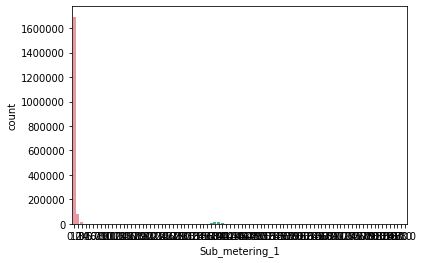

In [42]:
sns.countplot(x="Sub_metering_1",data=df)
plt.show()

In [43]:
Sub_metering_1_Null=df[df["Sub_metering_1"].isnull()].index.tolist()
print(Sub_metering_1_Null)

[6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25241, 25242, 25243, 25244, 25245, 25246, 25247, 25248, 25249, 25250, 25251, 38261, 38262, 38263, 38264, 38265, 38266, 38267, 38268, 38269, 38270, 38271, 38272, 38273, 38274, 38275, 44950, 44951, 44952, 44953, 44954, 44955, 44956, 44957, 44958, 44959, 44960, 44961, 44962, 44963, 44964, 44965, 44966, 44967, 44968, 44969, 44970, 44971, 44972, 44973, 44974, 44

In [44]:
df['Sub_metering_1'].iloc[Sub_metering_1_Null]="0.0"

In [45]:
Sub_metering_1_Null=df[df["Sub_metering_1"].isnull()].index.tolist()
print(Sub_metering_1_Null)

[]


In [46]:
print(df['Sub_metering_2'].value_counts(dropna=False))

0.0     1313608
1.0      323854
2.0      137634
3.0        6821
37.0       6416
         ...   
50.0         30
77.0         24
79.0          8
78.0          3
80.0          2
Name: Sub_metering_2, Length: 82, dtype: int64


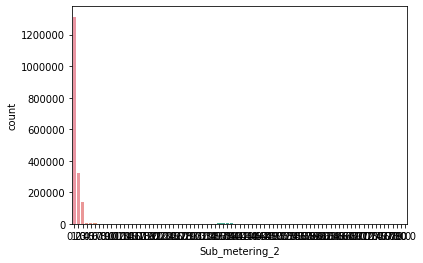

In [47]:
sns.countplot(x="Sub_metering_2",data=df)
plt.show()

In [48]:
Sub_metering_2_Null=df[df["Sub_metering_2"].isnull()].index.tolist()
print(Sub_metering_2_Null)

[203049, 203050, 203051, 203052, 203053, 203054, 203055, 203056, 203057, 203058, 203059, 203060, 203061, 203062, 203063, 203064, 203065, 203066, 203067, 203068, 203069, 203070, 203071, 203072, 203073, 203074, 203075, 203076, 203077, 203078, 203079, 203080, 203081, 203082, 203083, 282650, 282651, 282652, 282653, 282654, 282655, 282656, 282657, 282658, 282659, 282660, 282661, 282662, 282663, 282664, 282665, 282666, 282667, 282668, 282669, 282670, 282671, 282672, 282673, 282674, 282675, 297115, 297116, 297117, 297118, 297119, 297120, 297121, 297122, 297123, 297124, 297125, 297126, 297127, 297128, 297129, 297130, 297131, 297132, 297133, 297134, 297135, 297136, 298124, 298125, 298126, 298127, 298128, 298129, 298130, 298131, 298132, 298133, 298134, 298135, 298136, 298137, 298138, 444240, 444241, 444242, 444243, 444244, 444245, 444246, 444247, 444248, 444249, 444250, 444251, 444252, 444253, 444254, 444255, 444256, 444257, 444258, 558285, 558286, 558287, 558288, 558289, 558290, 558291, 558292,

In [49]:
df['Sub_metering_2'].iloc[Sub_metering_2_Null]="0.0"

In [50]:
Sub_metering_2_Null=df[df["Sub_metering_2"].isnull()].index.tolist()
print(Sub_metering_2_Null)

[]


In [51]:
print(df['Sub_metering_3'].value_counts(dropna=False))

0.0     794692
1.0     391805
18.0    325119
17.0    150931
19.0    108240
16.0     15349
12.0     12222
11.0      9297
29.0      5585
20.0      4129
28.0      3941
13.0      3740
10.0      2838
30.0      2152
9.0       1678
6.0       1663
2.0       1643
7.0       1618
3.0       1612
4.0       1597
8.0       1595
5.0       1559
27.0      1190
26.0       675
23.0       626
21.0       625
25.0       596
22.0       594
15.0       585
24.0       579
14.0       474
31.0       202
NaN        129
Name: Sub_metering_3, dtype: int64


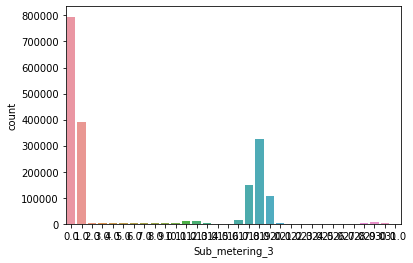

In [52]:
sns.countplot(x="Sub_metering_3",data=df)
plt.show()

In [53]:
Sub_metering_3_Null=df[df["Sub_metering_3"].isnull()].index.tolist()
print(Sub_metering_3_Null)

[301662, 301663, 301664, 301665, 301666, 301667, 301668, 301669, 301670, 301671, 301672, 359814, 359815, 359816, 359817, 359818, 359819, 359820, 359821, 359822, 359823, 359824, 359825, 359826, 671900, 671901, 671902, 671903, 671904, 671905, 671906, 671907, 671908, 671909, 671910, 671911, 671912, 671913, 671914, 671915, 671916, 671917, 671918, 671919, 671920, 671921, 671922, 671923, 671924, 671925, 671926, 671927, 671928, 671929, 671930, 671931, 671932, 671933, 671934, 671935, 671936, 671937, 671938, 671939, 671940, 671941, 671942, 671943, 671944, 671945, 671946, 671947, 671948, 671949, 671950, 671951, 671952, 671953, 671954, 671955, 671956, 1824557, 1824558, 1824559, 1824560, 1824561, 1824562, 1824563, 1824564, 1824565, 1824566, 1824567, 1824568, 1824569, 1824570, 1824571, 1824572, 1824573, 1824574, 1824575, 1824576, 1824577, 1824578, 1824579, 1824580, 1824581, 1824582, 1824583, 1824584, 1824585, 1824586, 1824587, 1824588, 1824589, 1824590, 1824591, 1824592, 1824593, 1824594, 1824595, 

In [54]:
df['Sub_metering_3'].iloc[Sub_metering_3_Null]="0.0"

In [55]:
Sub_metering_3_Null=df[df["Sub_metering_3"].isnull()].index.tolist()
print(Sub_metering_3_Null)

[]


In [56]:
df.isnull().sum()

Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [57]:
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0,1,16
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0,2,17
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0,1,17
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17


# Dropping The Unnecessary Columns

In [58]:
df=df.drop(['Sub_metering_3','Sub_metering_2','Sub_metering_1','Unnamed: 0','Date','Time'],axis=1)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.498,233.29,23.0
3,5.388,0.502,233.74,23.0
4,3.666,0.528,235.68,15.8
...,...,...,...,...
1849275,0.450,0.322,236.90,2.4
1849276,0.386,0.216,236.69,1.8
1849277,0.378,0.204,236.54,1.8
1849278,0.376,0.204,236.15,1.8


# Scaling

In [59]:
from sklearn.preprocessing import scale
colnames=["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_scaled=scale(df[colnames])

In [60]:
df_scaled=pd.DataFrame(df_scaled,columns=colnames)
print(df_scaled)

         Global_active_power  Global_reactive_power   Voltage  \
0                   2.892773               2.631722 -1.815294   
1                   3.957880               2.792062 -2.183784   
2                   3.970914               3.344344 -2.287327   
3                   3.983949               3.379975 -2.150285   
4                   2.380702               3.611577 -1.559482   
...                      ...                    ...       ...   
1849275            -0.613515               1.776575 -1.187947   
1849276            -0.673101               0.832351 -1.251899   
1849277            -0.680550               0.725458 -1.297580   
1849278            -0.682412               0.725458 -1.416350   
1849279            -0.684274               0.707642 -1.553392   

         Global_intensity  
0                3.033820  
1                4.052449  
2                4.052449  
3                4.052449  
4                2.458073  
...                   ...  
1849275         -0.5092

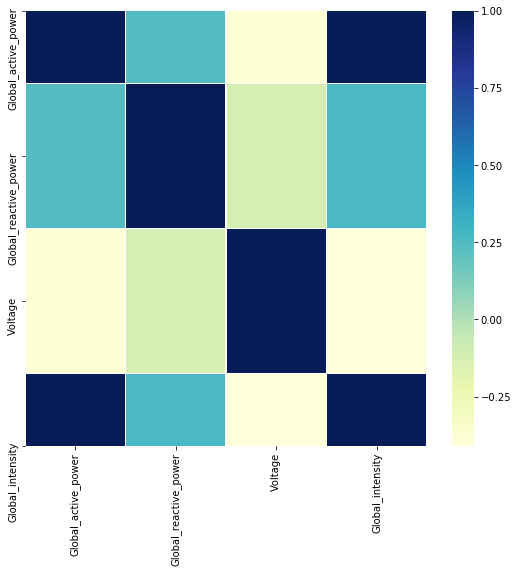

In [61]:
corrmat = df_scaled.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [62]:
count=0
for item in df_scaled['Global_intensity']:
    if item > 15:
        count=count+1
        
print(count) 

0


# Dropping NA 

In [63]:
df_scaled.dropna()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,2.892773,2.631722,-1.815294,3.033820
1,3.957880,2.792062,-2.183784,4.052449
2,3.970914,3.344344,-2.287327,4.052449
3,3.983949,3.379975,-2.150285,4.052449
4,2.380702,3.611577,-1.559482,2.458073
...,...,...,...,...
1849275,-0.613515,1.776575,-1.187947,-0.509239
1849276,-0.673101,0.832351,-1.251899,-0.642103
1849277,-0.680550,0.725458,-1.297580,-0.642103
1849278,-0.682412,0.725458,-1.416350,-0.642103


In [64]:
df_scaled.shape

(1849280, 4)

In [65]:
df_scaled[:] = np.nan_to_num(df)

In [66]:
X=df[["Global_active_power","Global_reactive_power","Voltage"]]
y=df['Global_intensity']

In [67]:
np.isnan(y).sum()

0

# Developing The Machine Learning Model

## Using Linear Regression

In [68]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=26)

In [70]:
lr_mod=LinearRegression()
lr_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=lr_mod.predict(X_test)
y_pred

array([1.37315768, 1.02448957, 0.7039942 , ..., 7.06456041, 0.97948331,
       1.33988658])

In [72]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1  


y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



### Accuracy

In [74]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))
lr_mod.score(X_train,y_train)

Accuracy: 0.9963841783468882


0.995989674822116

### Mean Squared Error

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

lr_rms=sqrt(mean_squared_error(y_test,y_pred))
print(lr_rms)

0.27160121962953143


## Using DecisionTree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor()  #by default it take 'gini' index value
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(regressor.score(X_train,y_train))

0.9999204321899843


In [77]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



### Accuracy

In [78]:
print("DT_Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

DT_Accuracy: 0.9963841783468882


### Mean squared error

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

DT_rms=sqrt(mean_squared_error(y_test,y_pred))
print(DT_rms)

0.3277275147774118


## Using RandomForest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
rdf=RandomForestRegressor() 

rdf.fit(X_train,y_train)
y_pred=rdf.predict(X_test)
print(rdf.score(X_train,y_train))

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9993346238595323


In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



### Accuracy

In [82]:
print("RT_Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

RT_Accuracy: 0.9963841783468882


### Mean squared error

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RT_rms=sqrt(mean_squared_error(y_test,y_pred))
print(RT_rms)

0.25352435094957587


## Using GradientBoostingRegressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor() 

gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print(gbr.score(X_train,y_train))

0.9964549878222612


In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



### Accuracy

In [86]:
print("GBR_Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

GBR_Accuracy: 0.9963841783468882


### Mean squared error

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

GBR_rms=sqrt(mean_squared_error(y_test,y_pred))
print(GBR_rms)

0.25517103250017154


## Using Bagging Regressor

In [88]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor() 

br.fit(X_train,y_train)
y_pred=br.predict(X_test)
print(br.score(X_train,y_train))

0.9993523706985293


In [89]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[ 18329    410]
 [  1596 534449]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18739
         1.0       1.00      1.00      1.00    536045

    accuracy                           1.00    554784
   macro avg       0.96      0.99      0.97    554784
weighted avg       1.00      1.00      1.00    554784



### accuracy

In [90]:
print("BR_Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

BR_Accuracy: 0.9963841783468882


### Mean squared error

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

BR_rms=sqrt(mean_squared_error(y_test,y_pred))
print(BR_rms)

0.2523466261043649


## Using KNeighbors Regressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor() 

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(knn.score(X_train,y_train))

0.9973281865311666


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

### accuracy

In [ ]:
print("KN_Accuracy:",metrics.accuracy_score(y_test_classes,y_pred_classes))

### Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

KN_rms=sqrt(mean_squared_error(y_test,y_pred))
print(KN_rms)